In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('FB', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,275.000000,265.200012,274.779999,268.940002,15106100,268.940002
2021-01-05,272.399994,268.209991,268.290009,270.970001,9871600,270.970001
2021-01-06,267.750000,260.010010,262.000000,263.309998,24354100,263.309998
2021-01-07,271.609985,264.779999,265.899994,268.739990,15789800,268.739990
2021-01-08,268.950012,263.179993,268.309998,267.570007,18528300,267.570007
...,...,...,...,...,...,...
2022-03-29,230.889999,225.289993,226.070007,229.860001,31417900,229.860001
2022-03-30,231.149994,226.710007,228.910004,227.850006,25588000,227.850006
2022-03-31,228.490005,222.259995,228.449997,222.360001,24192300,222.360001


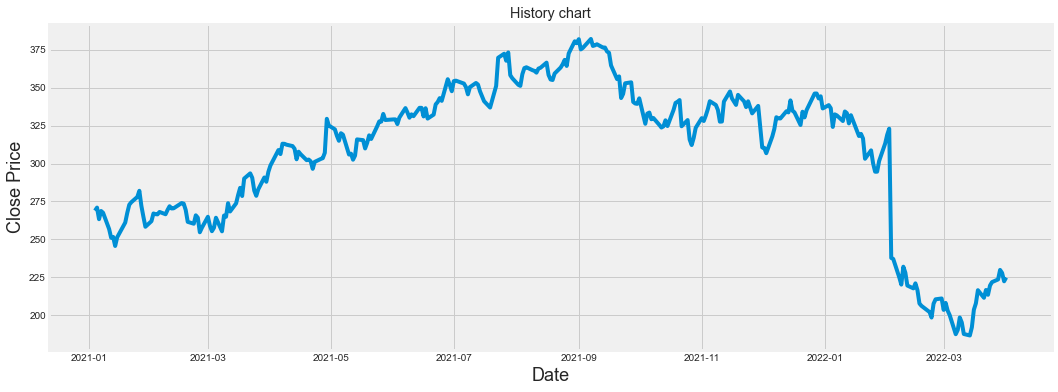

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.42091538],
       [0.43129635],
       [0.39212476],
       [0.41989256],
       [0.41390952],
       [0.35903859],
       [0.32963434],
       [0.33244694],
       [0.30176425],
       [0.33101508],
       [0.38082335],
       [0.4134493 ],
       [0.44101251],
       [0.449348  ],
       [0.46729742],
       [0.48795699],
       [0.43727955],
       [0.40076707],
       [0.36665807],
       [0.38547691],
       [0.41140367],
       [0.40920478],
       [0.40838655],
       [0.41661982],
       [0.40884677],
       [0.42352346],
       [0.43589872],
       [0.42833043],
       [0.42889287],
       [0.4466377 ],
       [0.44459222],
       [0.42321665],
       [0.38317564],
       [0.37688564],
       [0.40516484],
       [0.39723855],
       [0.34804399],
       [0.36302733],
       [0.40030685],
       [0.37008438],
       [0.35172592],
       [0.36312971],
       [0.39708514],
       [0.35121451],
       [0.40455122],
       [0.40025566],
       [0.44617748],
       [0.418

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.42091538, 0.43129635, 0.39212476, 0.41989256, 0.41390952,
       0.35903859, 0.32963434, 0.33244694, 0.30176425, 0.33101508,
       0.38082335, 0.4134493 , 0.44101251, 0.449348  , 0.46729742,
       0.48795699, 0.43727955, 0.40076707, 0.36665807, 0.38547691,
       0.41140367, 0.40920478, 0.40838655, 0.41661982, 0.40884677,
       0.42352346, 0.43589872, 0.42833043, 0.42889287, 0.4466377 ,
       0.44459222, 0.42321665, 0.38317564, 0.37688564, 0.40516484,
       0.39723855, 0.34804399, 0.36302733, 0.40030685, 0.37008438,
       0.35172592, 0.36312971, 0.39708514, 0.35121451, 0.40455122,
       0.40025566, 0.44617748, 0.41815389, 0.44551266, 0.47379187,
       0.49798011, 0.47041675, 0.52917406, 0.54671445, 0.53183332,
       0.48841737, 0.47103038, 0.49291736, 0.53280495, 0.51838405])]
[0.5517770423525645]

[array([0.42091538, 0.43129635, 0.39212476, 0.41989256, 0.41390952,
       0.35903859, 0.32963434, 0.33244694, 0.30176425, 0.33101508,
       0.38082335, 0.4134493 , 0.441

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 3s 139ms/step - loss: 0.2795
Epoch 2/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0399
Epoch 3/256
2/2 [==============================] - 0s 138ms/step - loss: 0.0709
Epoch 4/256
2/2 [==============================] - 0s 128ms/step - loss: 0.0171
Epoch 5/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0249
Epoch 6/256
2/2 [==============================] - 0s 132ms/step - loss: 0.0342
Epoch 7/256
2/2 [==============================] - 0s 132ms/step - loss: 0.0242
Epoch 8/256
2/2 [==============================] - 0s 135ms/step - loss: 0.0129
Epoch 9/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0143
Epoch 10/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0194
Epoch 11/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0153
Epoch 12/256
2/2 [==============================] - 0s 133ms/step - loss: 0.0108
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12.111191332748742

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10796/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


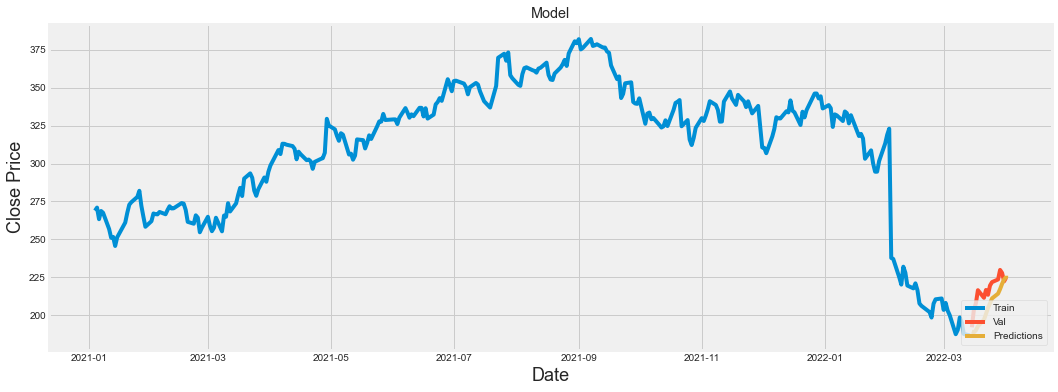

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,192.029999,189.207306
2022-03-16,203.630005,188.671173
2022-03-17,207.839996,190.045486
2022-03-18,216.490005,192.748901
2022-03-21,211.490005,196.987640
2022-03-22,216.649994,200.841202
2022-03-23,213.460007,204.809692
2022-03-24,219.570007,207.891663
2022-03-25,221.820007,211.079468
